<a href="https://colab.research.google.com/github/ju-sants/Desafios-DNC/blob/main/Desafio_5_Tabela_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 5: Preparando e analisando o dataset de um e-commerce.

**Sugiro fortemente a execução total deste notebook antes de visualizá-lo**

## Função Automatizada para a criação de uma Tabela de RFM

**Começo esse Notebook com o produto final de toda a análise, que apenas resume tudo o que foi feito e se aplica perfeitamente a novos dados desde que a tabela tenha a mesma configuração de colunas**

### Definição da função

In [ ]:
def calculo_recencia(serie):
  global last_dt_df
  last_dt_cl = serie.max()
  return last_dt_df - last_dt_cl

def Tabela_RFM(df):

  df = df.copy()

  df = df.dropna(subset=['CustomerID'])
  df = df.query('Quantity < 10000 or UnitPrice < 5000')
  df = df.drop_duplicates()
  df = df.query('Quantity > 0 and UnitPrice > 0')

  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
  df['CustomerID'] = df['CustomerID'].astype(int)
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
  df['Mês'] = df['InvoiceDate'].dt.month

  global last_dt_df
  last_dt_df = df['InvoiceDate'].max()

  tab_aux_RFM = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate']).TotalPrice.sum().reset_index()
  Tabela_RFM = tab_aux_RFM.groupby('CustomerID')[['TotalPrice', 'InvoiceNo', 'InvoiceDate']].agg({'InvoiceDate': calculo_recencia, 'InvoiceNo': 'count', 'TotalPrice': 'sum'})
  Tabela_RFM.rename(columns={'InvoiceDate': 'R', 'InvoiceNo': 'F', 'TotalPrice': 'M'}, inplace=True)
  Tabela_RFM.reset_index()
  Tabela_RFM.to_csv('Tabela_RFM.csv')

### Utilizando Tabela_RFM()

In [ ]:
import pandas as pd

df = pd.read_csv('https://docs.google.com/spreadsheets/d/1xZ7RhBKljOF6Pbq82PE-'
'Xqb44Rwxb0cQGhHCdFY1Ras/export?format=csv&gid=364449565')
Tabela_RFM(df)
# A tabela está salva em seus arquivos do colab



---



# Processo de análise e criação

### Settings

#### Libraries

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c2fd1f49706447918e99715b3ad272dce28bbbe8ef0fc7a1aa5c4b83167994bd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

#### Functions

In [ ]:
def is_outlier(serie, factor=1.5):
  import numpy as np

  print(serie.name)

  Q1, Q3 = np.quantile(serie, [.25, .75])
  IQR = Q3 - Q1

  lower_fence = Q1 - factor * IQR
  upper_fence = Q3 + factor * IQR

  return (serie < lower_fence) | (serie > upper_fence)

#### Load Data

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1xZ7RhBKljOF6Pbq82PE-'
'Xqb44Rwxb0cQGhHCdFY1Ras/export?format=csv&gid=364449565')

### E.D.A e Data Preparation

#### E.D.A

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 08:34,1.69,13047.0,United Kingdom


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
report = ProfileReport(df)
report.to_notebook_iframe()

#### Nulos

In [ ]:
# quantas linhas tem pelo menos um nulo?
df.isna().any(axis=1).sum()

135080

In [ ]:
# quais as colunas que possuem nulos?
df.isna().any()

,0
InvoiceNo,False
StockCode,False
Description,True
Quantity,False
InvoiceDate,False
UnitPrice,False
CustomerID,True
Country,False


**Nulos na coluna de identificação nesse caso são considerados erros, por isso vamos dropá-los**

In [ ]:
df = df.dropna(subset=['CustomerID'])

#### Outliers

In [ ]:
df[df.select_dtypes('number').apply(is_outlier, factor=5).any(axis=1)]

Quantity
UnitPrice
CustomerID


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 08:45,18.00,12583.0,France
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 09:00,2.55,13748.0,United Kingdom
83,536376,21733,RED HANGING HEART T-LIGHT HOLDER,64,12/1/2010 09:32,2.55,15291.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/1/2010 09:37,0.42,14688.0,United Kingdom
102,536378,85071B,RED CHARLIE+LOLA PERSONAL DOORSIGN,96,12/1/2010 09:37,0.38,14688.0,United Kingdom
...,...,...,...,...,...,...,...,...
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.00,12662.0,Germany
541746,581571,23167,SMALL CERAMIC TOP STORAGE JAR,96,12/9/2011 12:00,0.69,15311.0,United Kingdom
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.00,12526.0,Germany
541768,581578,POST,POSTAGE,3,12/9/2011 12:16,18.00,12713.0,Germany


In [ ]:
df[df.select_dtypes('number').apply(is_outlier, factor=10).any(axis=1)]

Quantity
UnitPrice
CustomerID


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/1/2010 09:37,0.42,14688.0,United Kingdom
178,536387,79321,CHILLI LIGHTS,192,12/1/2010 09:58,3.82,16029.0,United Kingdom
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,12/1/2010 09:58,3.37,16029.0,United Kingdom
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,12/1/2010 09:58,3.37,16029.0,United Kingdom
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,12/1/2010 09:58,1.45,16029.0,United Kingdom
...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,12/9/2011 09:44,3.39,15694.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541545,581501,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,180,12/9/2011 10:46,0.19,12985.0,United Kingdom
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,12/9/2011 11:50,3.26,18102.0,United Kingdom


In [ ]:
df[df.select_dtypes('number').apply(is_outlier, factor=20).any(axis=1)]

Quantity
UnitPrice
CustomerID


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
181,536387,22466,FAIRY TALE COTTAGE NIGHTLIGHT,432,12/1/2010 09:58,1.45,16029.0,United Kingdom
182,536387,21731,RED TOADSTOOL LED NIGHT LIGHT,432,12/1/2010 09:58,1.25,16029.0,United Kingdom
219,536390,20668,DISCO BALL CHRISTMAS DECORATION,288,12/1/2010 10:19,0.10,17511.0,United Kingdom
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,12/1/2010 10:29,165.00,13705.0,United Kingdom
730,536437,17021,NAMASTE SWAGAT INCENSE,600,12/1/2010 12:12,0.24,13694.0,United Kingdom
...,...,...,...,...,...,...,...,...
540071,581459,22197,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,United Kingdom
540342,581476,16008,SMALL FOLDING SCISSOR(POINTED EDGE),240,12/9/2011 08:48,0.12,12433.0,Norway
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 09:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 09:27,2.08,16446.0,United Kingdom


Como não temos um limite certo para dropar os outliers vamos retirar do dataframe todos os que a quantidade for maior que 10000 e o preço unitário maior que 5000

In [ ]:
df = df.query('Quantity < 10000 or UnitPrice < 5000')

#### Duplicatas

In [ ]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df = df.drop_duplicates()

#### Outras Anomalias

In [ ]:
# Valores iguais ou menores que 0
df = df.query('Quantity > 0 and UnitPrice > 0')

#### Alterando tipo de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


#### Feature Engineering

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Análises

#### Análises Gráficas

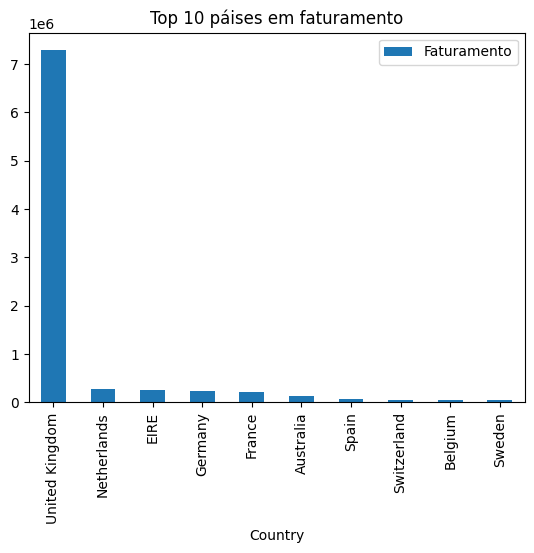

In [ ]:
(
    df.groupby('Country')
    .TotalPrice.sum()
    .to_frame('Faturamento')
    .sort_values('Faturamento', ascending=False)
    .head(10)
).plot.bar()
plt.title('Top 10 páises em faturamento');

Retirando United Kingdom para melhor visualização dos outros paises

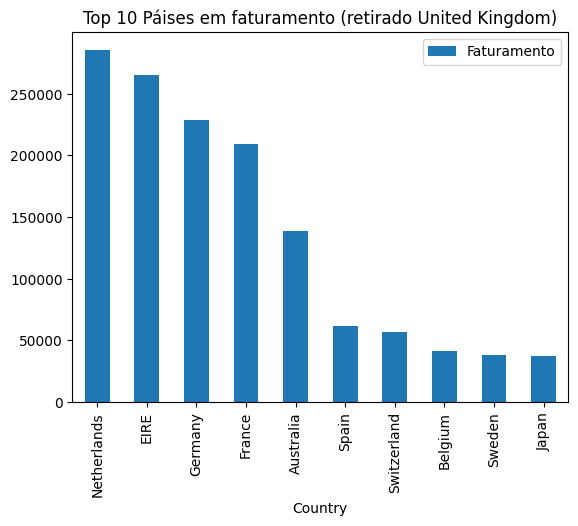

In [ ]:
(
    df.groupby('Country')
    .TotalPrice.sum()
    .to_frame('Faturamento')
    .sort_values('Faturamento', ascending=False)
    .drop('United Kingdom')
    .head(10)
).plot.bar()
plt.title('Top 10 Páises em faturamento (retirado United Kingdom)');

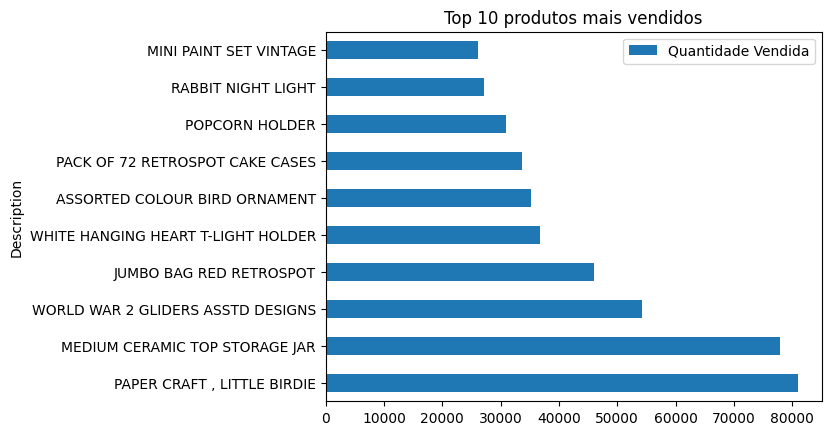

In [ ]:
(
    df.groupby('Description').Quantity
    .sum()
    .to_frame('Quantidade Vendida')
    .sort_values('Quantidade Vendida', ascending=False)
    .head(10)
).plot.barh()
plt.title('Top 10 produtos mais vendidos');

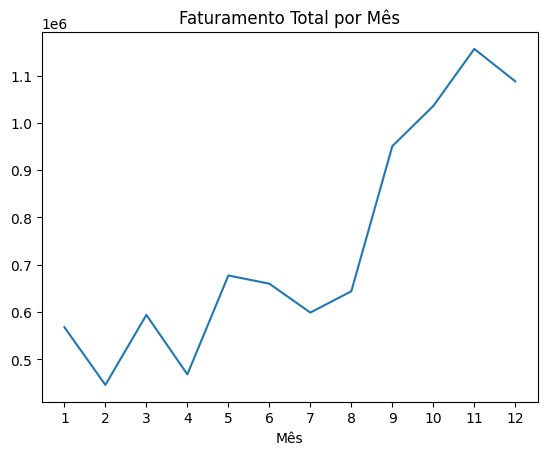

In [ ]:
df['Mês'] = df['InvoiceDate'].dt.month
df.groupby('Mês').TotalPrice.sum().plot.line()
plt.xticks(df['Mês'].unique())
plt.title('Faturamento Total por Mês');

In [ ]:
import seaborn as sns

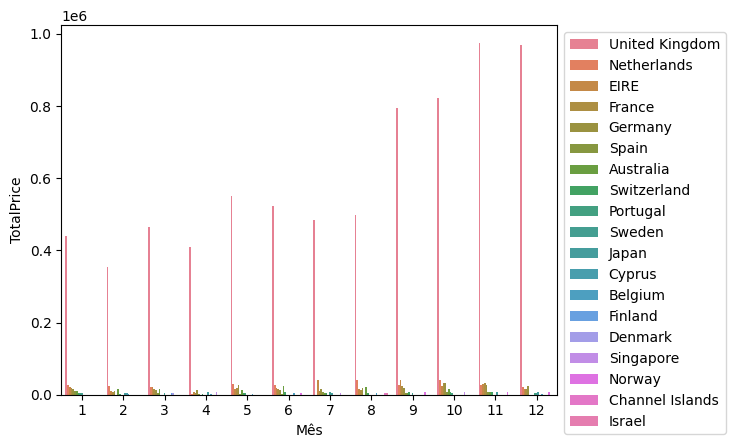

In [ ]:
tab_aux = (
    df.groupby(['Mês', 'Country'])
    .TotalPrice.sum()
    .reset_index()
    .sort_values(by=['Mês', 'TotalPrice'], ascending=[True, False])
)
top10Country_mes = tab_aux.groupby('Mês').head(10)
sns.barplot(data=top10Country_mes, x='Mês', y='TotalPrice', hue='Country')
plt.legend(bbox_to_anchor=(1, 1))

Plotando sem o United Kingdom para melhor visualização

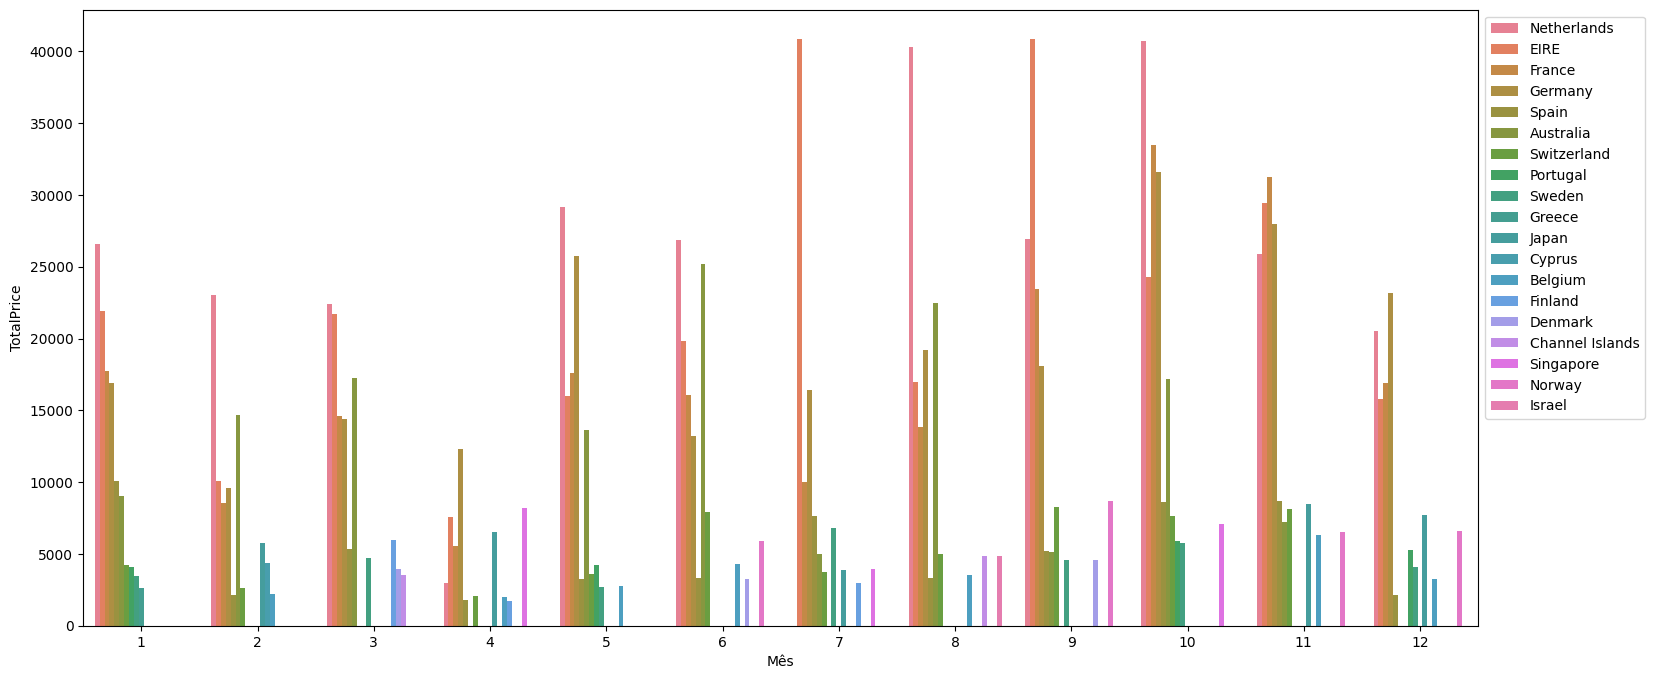

In [ ]:
tab_aux = (
    df[df['Country'] != "United Kingdom"]
    .groupby(['Mês', 'Country'])
    .TotalPrice.sum()
    .reset_index()
    .sort_values(by=['Mês', 'TotalPrice'], ascending=[True, False])
)
top10Country_mes = tab_aux.groupby('Mês').head(10)

plt.figure(figsize=(18, 8))
sns.barplot(data=top10Country_mes, x='Mês', y='TotalPrice', hue='Country')
plt.legend(bbox_to_anchor=(1, 1))

#### Análise RFM

In [ ]:
def calculo_recencia(serie):
  last_dt_df = df['InvoiceDate'].max()
  last_dt_cl = serie.max()
  return last_dt_df - last_dt_cl

In [ ]:
tab_aux_RFM = df.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate']).TotalPrice.sum().reset_index()
Tabela_RFM = tab_aux_RFM.groupby('CustomerID')[['TotalPrice', 'InvoiceNo', 'InvoiceDate']].agg({'InvoiceDate': calculo_recencia, 'InvoiceNo': 'count', 'TotalPrice': 'sum'})

In [ ]:
Tabela_RFM.rename(columns={'InvoiceDate': 'R', 'InvoiceNo': 'F', 'TotalPrice': 'M'}, inplace=True)
Tabela_RFM.reset_index()

,CustomerID,R,F,M
0,12346,325 days 02:49:00,1,77183.60
1,12347,1 days 20:58:00,7,4310.00
2,12348,74 days 23:37:00,4,1797.24
3,12349,18 days 02:59:00,1,1757.55
4,12350,309 days 20:49:00,1,334.40
...,...,...,...,...
4333,18280,277 days 02:58:00,1,180.60
4334,18281,180 days 01:57:00,1,80.82
4335,18282,7 days 01:07:00,2,178.05
4336,18283,3 days 00:48:00,16,2045.53


In [ ]:
Tabela_RFM.to_csv('Tabela_RFM.csv')